In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [12]:
#read data
df = pd.read_csv('/kaggle/input/student-performance-prediction-csv/student_performance_prediction.csv')

In [13]:
# Fill missing values
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)
df['Participation in Extracurricular Activities'].fillna(df['Participation in Extracurricular Activities'].mode()[0], inplace=True)
df['Parent Education Level'].fillna(df['Parent Education Level'].mode()[0], inplace=True)
df['Passed'].fillna(df['Passed'].mode()[0], inplace=True)

/tmp/ipykernel_89/2857461019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
/tmp/ipykernel_89/2857461019.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [14]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [15]:
# Drop Student ID
df.drop(columns=["Student ID"], inplace=True)


In [16]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
# Split data
X = df.drop(columns=['Passed'])
y = df['Passed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [19]:
# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [20]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.521375
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.10      0.16      3794
           1       0.53      0.90      0.67      4206

    accuracy                           0.52      8000
   macro avg       0.50      0.50      0.41      8000
weighted avg       0.50      0.52      0.43      8000



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
#Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.521375
Precision: 0.5260539046302696
Recall: 0.9048977650974798


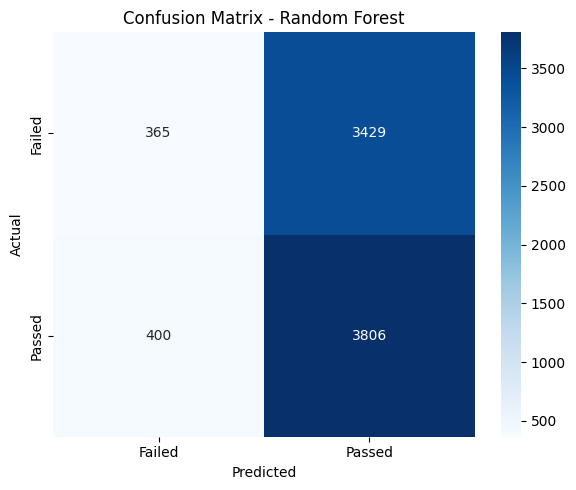

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# The drawing
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Failed', 'Passed'], yticklabels=['Failed', 'Passed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()